# Analysis_4
- find the pokemon capture rate

In [2]:
import oauth2 as oauth
import json
import argparse
import pandas as pd
import requests
import time
from pandas import Series, DataFrame
import os

In [13]:
consumer_key = os.environ.get('consumer_key')
consumer_secret = os.environ.get('consumer_secret')
access_token_key = os.environ.get('access_token_key')
access_token_secret = os.environ.get('access_token_secret')

In [4]:
consumer = oauth.Consumer(key=consumer_key, secret=consumer_secret)
access_token = oauth.Token(key=access_token_key, secret=access_token_secret)
client = oauth.Client(consumer, access_token)

In [15]:
url = "https://api.twitter.com/1.1/search/tweets.json?"

In [47]:
def download_twitter(l):
    for x in l:
        time = 1
        while time < 4:
            if (time == 1):
                s ='&q=%23' + x + '&count=100'
            else:
                name = 'ana_4_output/twitter_' + x + '_' + str(time - 1) + '.json'
                P = json.load(open(name))
                P['search_metadata']['max_id']
                s ='q=%23' + x +'&since_id=' + str(P['search_metadata']['max_id'])  + '&count=100'
                
            response, data = client.request(url + s)
            print(str(time),url,s)
            tweets = json.loads(data.decode("utf-8"))
            fileN = 'ana_4_output/twitter_' + x + '_' + str(time) + '.json'
            with open(fileN,'w')as f:
                json.dump(tweets, f)
            time = time + 1

In [21]:
best = pd.read_csv('ana_2_output/ana2_2_best_appear&population.csv')
best

,Pokemon No.,Name,Type 1,appear_rate,l_evening,l_morn,l_night,population_density
0,149,Dragonite,Dragon,0.008000,0.461538,0.230769,0.307692,1396.411398
1,143,Snorlax,Normal,0.024333,0.280000,0.360000,0.360000,1381.407307
2,131,Lapras,Water,0.006667,0.166667,0.416667,0.416667,1151.883052
3,59,Arcanine,Fire,0.010667,0.272727,0.090909,0.636364,1296.309300
4,103,Exeggutor,Grass,0.009667,0.285714,0.214286,0.500000,1481.762987
5,89,Muk,Poison,0.001667,0.200000,0.400000,0.400000,1357.125044
6,68,Machamp,Fighting,NaN,NaN,NaN,NaN,NaN
7,36,Clefable,Fairy,0.021333,0.250000,0.250000,0.500000,1560.368241
8,76,Golem,Rock,0.006667,0.250000,0.250000,0.500000,794.467895
9,112,Rhydon,Ground,0.014333,0.285714,0.333333,0.380952,1903.292261


In [22]:
l_best_name = best['Name'].values

In [ ]:
download_twitter(l_best_name)

In [25]:
P = json.load(open('../data/data_twitter_api/twitter_Dragonite_1.json'))
P['search_metadata']['count']

100

# processing

In [26]:
import nltk
from nltk import FreqDist
from nltk.corpus import wordnet as wn

In [27]:
porter = nltk.PorterStemmer()

In [28]:
def find_verb(file):
    P = json.load(open(file))
    l_words = []
    for x in P['statuses']:
        a = [porter.stem(t.lower()) for t in  nltk.word_tokenize(x['text'])]
        for y in nltk.pos_tag(a):
            if 'VB' in y[1] :
                l_words.append(y[0])
    return l_words

In [29]:
def count_most(lists):
    fd = FreqDist(lists) 
    word_list = []
    for word in fd.keys():
        word_list.append((word, fd[word])) 
    sorted_list = sorted(word_list, key=lambda t:t[1], reverse=True)
    return sorted_list
    print('Most Frequent Words in Persuasion:\n', sorted_list[:10])

In [31]:
l = []
for x in range(1,4):
    fileName ='../data/data_twitter_api/twitter_Dragonite_' + str(x) + '.json'
    l = l + find_verb(fileName)
len(l)

92

In [32]:
most_verb = count_most(l)

In [33]:
print(most_verb)

[('♂', 8), ('see', 8), ('seen', 6), ('wing', 5), ('woke', 5), ('thi', 5), ('is', 4), ('be', 4), ('♀', 4), ("'s", 3), ('are', 2), ('caught', 2), ('win', 2), ('prem', 2), ('want', 2), ('got', 2), ('pokemongo100iv', 2), ('rodrocketmedesenha', 1), ('📱🐉', 1), ('drew', 1), ('complet', 1), ('wow', 1), ('keep', 1), ('send', 1), ('das_bibhutosh', 1), ('knew', 1), ('wa', 1), ('took', 1), ('go', 1), ('prox', 1), ('friggin', 1), ('catch', 1), ('made', 1), ('finish', 1), ('spawn', 1), ('love', 1), ('been', 1), ('know', 1), ('make', 1), ('left', 1), ('began', 1), ('hatch', 1), ('atrapar', 1)]


In [34]:
l_positive = ['see','is','get','catch','find','finish','make','love','appear','spawn']

In [35]:
l_negative = ['run','go','disappear','flee']

In [36]:
def find_sys(l):
    l_all = l
    for x in l:
        sys = wn.synsets(x)[0].lemma_names()
        l_all =l_all + sys
        
    return l_all

In [37]:
l_positive = find_sys(l_positive)

In [38]:
l_negative = find_sys(l_negative)

In [39]:
def count_rate(file,l_positive,l_negative):
    P = json.load(open(file))
    get = 0
    gone = 0
    answer = 0.5
    for x in P['statuses']:
        a = [porter.stem(t.lower()) for t in  nltk.word_tokenize(x['text'])]
        for y in a:
            if y in l_positive :
                get = get + 1
            elif y in l_negative:
                gone = gone + 1
        if (get+gone) != 0:
            answer = get/(get+gone)
    return [file.split('_')[-2],answer]

In [41]:
count_rate('../data/data_twitter_api//twitter_Dragonite_1.json',l_positive,l_negative)

['Dragonite', 0.92]

In [42]:
l_json = os.listdir('../data/data_twitter_api')

In [44]:
l_all= []
for x in l_json:
    file = '../data/data_twitter_api/' + x
    l_all.append(count_rate(file,l_positive,l_negative))

In [45]:
l_all

[['Jynx', 0.5],
 ['Muk', 0.5],
 ['Muk', 0.5],
 ['Clefable', 0.8333333333333334],
 ['Exeggutor', 0.5],
 ['Clefable', 0.5],
 ['Pinsir', 0.5],
 ['Snorlax', 0.5],
 ['Golem', 0.5],
 ['Gengar', 0.5],
 ['Jolteon', 0.5],
 ['Hypno', 0.6060606060606061],
 ['Rhydon', 1.0],
 ['Snorlax', 1.0],
 ['Pinsir', 0.5],
 ['Gengar', 0.5],
 ['Jynx', 0.5],
 ['Dragonite', 0.92],
 ['Gengar', 0.9444444444444444],
 ['Rhydon', 0.5],
 ['Arcanine', 0.8846153846153846],
 ['Lapras', 1.0],
 ['Lapras', 0.5],
 ['Arcanine', 0.5],
 ['Dragonite', 0.5],
 ['Arcanine', 0.5],
 ['Pinsir', 1.0],
 ['Muk', 0.5],
 ['Machamp', 0.5],
 ['Hypno', 0.5],
 ['Exeggutor', 1.0],
 ['Golem', 0.5],
 ['Machamp', 0.5],
 ['Dragonite', 0.5],
 ['Exeggutor', 0.5],
 ['Snorlax', 0.5],
 ['Hypno', 0.5],
 ['Rhydon', 0.5],
 ['Clefable', 0.5],
 ['Jolteon', 1.0],
 ['Golem', 1.0],
 ['Jynx', 0.5151515151515151],
 ['Jolteon', 0.5],
 ['Lapras', 0.5],
 ['Machamp', 1.0]]

In [46]:
l_best_name

array(['Dragonite', 'Snorlax', 'Lapras', 'Arcanine', 'Exeggutor', 'Muk',
       'Machamp', 'Clefable', 'Golem', 'Rhydon', 'Hypno', 'Jolteon',
       'Pinsir', 'Gengar', 'Jynx'], dtype=object)

In [47]:
l_sum = []
for x in l_best_name:
    l_sum.append([x,0])

In [48]:
l_all
for x in l_all:
    for y in l_sum:
        if x[0] == y[0]:
            y[1] = y[1] + x[1]

In [49]:
l_sum

[['Dragonite', 1.92],
 ['Snorlax', 2.0],
 ['Lapras', 2.0],
 ['Arcanine', 1.8846153846153846],
 ['Exeggutor', 2.0],
 ['Muk', 1.5],
 ['Machamp', 2.0],
 ['Clefable', 1.8333333333333335],
 ['Golem', 2.0],
 ['Rhydon', 2.0],
 ['Hypno', 1.606060606060606],
 ['Jolteon', 2.0],
 ['Pinsir', 2.0],
 ['Gengar', 1.9444444444444444],
 ['Jynx', 1.5151515151515151]]

In [50]:
l_name = []
l_rate = []
for x in l_sum:
    l_name.append(x[0])
    l_rate.append(x[1]/3)

In [51]:
df_rate = pd.DataFrame({'Name': l_name, 'Capture_rate': l_rate})

In [52]:
df_rate

,Capture_rate,Name
0,0.640000,Dragonite
1,0.666667,Snorlax
2,0.666667,Lapras
3,0.628205,Arcanine
4,0.666667,Exeggutor
5,0.500000,Muk
6,0.666667,Machamp
7,0.611111,Clefable
8,0.666667,Golem
9,0.666667,Rhydon


In [53]:
df = pd.DataFrame.merge(df_rate,best,on='Name')

In [54]:
df

,Capture_rate,Name,Pokemon No.,Type 1,appear_rate,l_evening,l_morn,l_night,population_density
0,0.640000,Dragonite,149,Dragon,0.008000,0.461538,0.230769,0.307692,1396.411398
1,0.666667,Snorlax,143,Normal,0.024333,0.280000,0.360000,0.360000,1381.407307
2,0.666667,Lapras,131,Water,0.006667,0.166667,0.416667,0.416667,1151.883052
3,0.628205,Arcanine,59,Fire,0.010667,0.272727,0.090909,0.636364,1296.309300
4,0.666667,Exeggutor,103,Grass,0.009667,0.285714,0.214286,0.500000,1481.762987
5,0.500000,Muk,89,Poison,0.001667,0.200000,0.400000,0.400000,1357.125044
6,0.666667,Machamp,68,Fighting,NaN,NaN,NaN,NaN,NaN
7,0.611111,Clefable,36,Fairy,0.021333,0.250000,0.250000,0.500000,1560.368241
8,0.666667,Golem,76,Rock,0.006667,0.250000,0.250000,0.500000,794.467895
9,0.666667,Rhydon,112,Ground,0.014333,0.285714,0.333333,0.380952,1903.292261


In [55]:
# get a list of columns
cols = list(df)
# move the column to head of list using index, pop and insert
cols.insert(5, cols.pop(cols.index('Capture_rate')))
df = df.ix[:, cols]
df

,Name,Pokemon No.,Type 1,appear_rate,l_evening,Capture_rate,l_morn,l_night,population_density
0,Dragonite,149,Dragon,0.008000,0.461538,0.640000,0.230769,0.307692,1396.411398
1,Snorlax,143,Normal,0.024333,0.280000,0.666667,0.360000,0.360000,1381.407307
2,Lapras,131,Water,0.006667,0.166667,0.666667,0.416667,0.416667,1151.883052
3,Arcanine,59,Fire,0.010667,0.272727,0.628205,0.090909,0.636364,1296.309300
4,Exeggutor,103,Grass,0.009667,0.285714,0.666667,0.214286,0.500000,1481.762987
5,Muk,89,Poison,0.001667,0.200000,0.500000,0.400000,0.400000,1357.125044
6,Machamp,68,Fighting,NaN,NaN,0.666667,NaN,NaN,NaN
7,Clefable,36,Fairy,0.021333,0.250000,0.611111,0.250000,0.500000,1560.368241
8,Golem,76,Rock,0.006667,0.250000,0.666667,0.250000,0.500000,794.467895
9,Rhydon,112,Ground,0.014333,0.285714,0.666667,0.333333,0.380952,1903.292261


In [56]:
df = df.set_index('Pokemon No.')
df

,Name,Type 1,appear_rate,l_evening,Capture_rate,l_morn,l_night,population_density
Pokemon No.,,,,,,,,
149,Dragonite,Dragon,0.008000,0.461538,0.640000,0.230769,0.307692,1396.411398
143,Snorlax,Normal,0.024333,0.280000,0.666667,0.360000,0.360000,1381.407307
131,Lapras,Water,0.006667,0.166667,0.666667,0.416667,0.416667,1151.883052
59,Arcanine,Fire,0.010667,0.272727,0.628205,0.090909,0.636364,1296.309300
103,Exeggutor,Grass,0.009667,0.285714,0.666667,0.214286,0.500000,1481.762987
89,Muk,Poison,0.001667,0.200000,0.500000,0.400000,0.400000,1357.125044
68,Machamp,Fighting,NaN,NaN,0.666667,NaN,NaN,NaN
36,Clefable,Fairy,0.021333,0.250000,0.611111,0.250000,0.500000,1560.368241
76,Golem,Rock,0.006667,0.250000,0.666667,0.250000,0.500000,794.467895


In [57]:
df.to_csv('df_poke_best_Capture.csv', encoding='utf-8')

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ana_4_output/df_poke_best_Capture.csv').sort(columns='Total_values', axis=0, ascending=True)
df.head()

/home/pandakillalot/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Pokemon No.,Name,Type 1,Total_values,appear_rate,Capture_rate
14,124,Jynx,Ice,1820.0,0.251667,0.505051
13,94,Gengar,Ghost,2178.6,0.004000,0.648148
12,127,Pinsir,Bug,2229.0,0.468000,0.666667
11,135,Jolteon,Electric,2247.0,0.003333,0.666667
10,97,Hypno,Psychic,2315.8,0.106000,0.535354


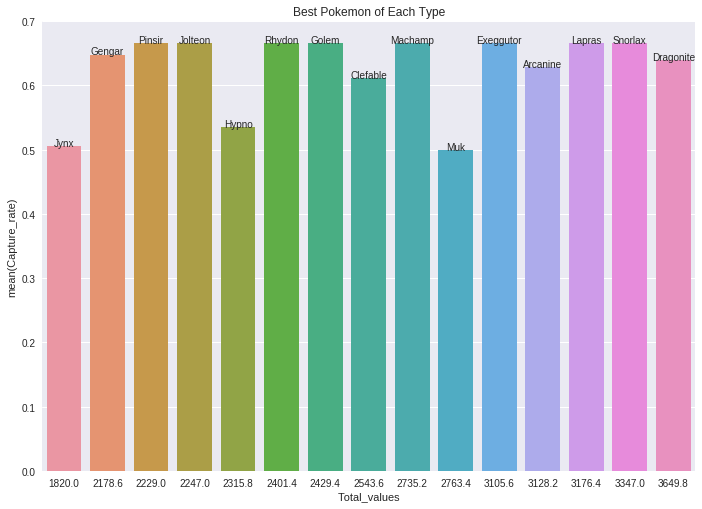

In [59]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="Total_values", y="Capture_rate", data=df)
i  = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.0001,
            df['Name'].values[i],
            ha="center")
    i = i+1
sns.plt.title('Best Pokemon of Each Type')

In [60]:
fig.savefig('ana_4_capture_rate.png')